In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load ECG data
train_data = pd.read_csv("/kaggle/input/ecg-100fs/dataset_2000.csv")
test_data = pd.read_csv("/kaggle/input/test-100fs/21836_lr.csv")

In [47]:
train_lead_ii_data = train_data['II'].values
train_lead_i_data = train_data['V6'].values

test_lead_ii_data = test_data['II'].values
test_lead_i_data = test_data['V6'].values

In [48]:
# Data segmentation
sequence_length = 100
def segment_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = segment_data(train_lead_ii_data, sequence_length)
X_test, y_test = segment_data(test_lead_ii_data, sequence_length)


In [49]:
# Model Architecture
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(LSTM(64))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')


In [50]:
# Training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, batch_size=512, verbose=1, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/200
3125/3125 [==============================] - 41s 12ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 2/200
3125/3125 [==============================] - 36s 12ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/200
3125/3125 [==============================] - 37s 12ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 4/200
3125/3125 [==============================] - 36s 12ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 5/200
3125/3125 [==============================] - 36s 12ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/200
3125/3125 [==============================] - 37s 12ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 7/200
3125/3125 [==============================] - 37s 12ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 8/200
3125/3125 [==============================] - 36s 12ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 9/200
3125/3125 [==============================] - 37s 12ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 10/200
3125/3125 [==============================]

In [51]:

# Evaluation on Test Data
y_pred = model.predict(X_test)

29/29 [==============================] - 0s 3ms/step


In [52]:
# Calculate Metrics
r2 = r2_score(y_test, y_pred)
correlation_coefficient, _ = pearsonr(y_test.flatten(), y_pred.flatten())
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate Regression Coefficient
regression_model = LinearRegression()
regression_model.fit(y_pred.reshape(-1, 1), y_test)
regression_coefficient = regression_model.coef_[0]

# Print Metrics
print(f"R-squared: {r2:.4f}")
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"Regression Coefficient: {regression_coefficient:.4f}")
print(f"Mean Squared  Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R-squared: 0.9182
Correlation Coefficient: 0.9592
Regression Coefficient: 1.0404
Mean Squared  Error (MSE): 0.0013
Root Mean Squared Error (RMSE): 0.0365


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

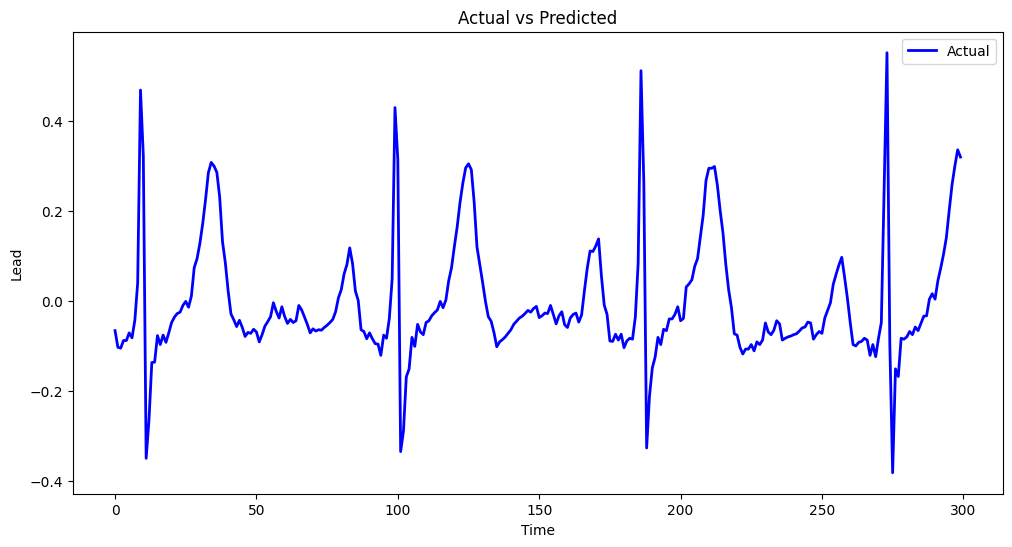

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

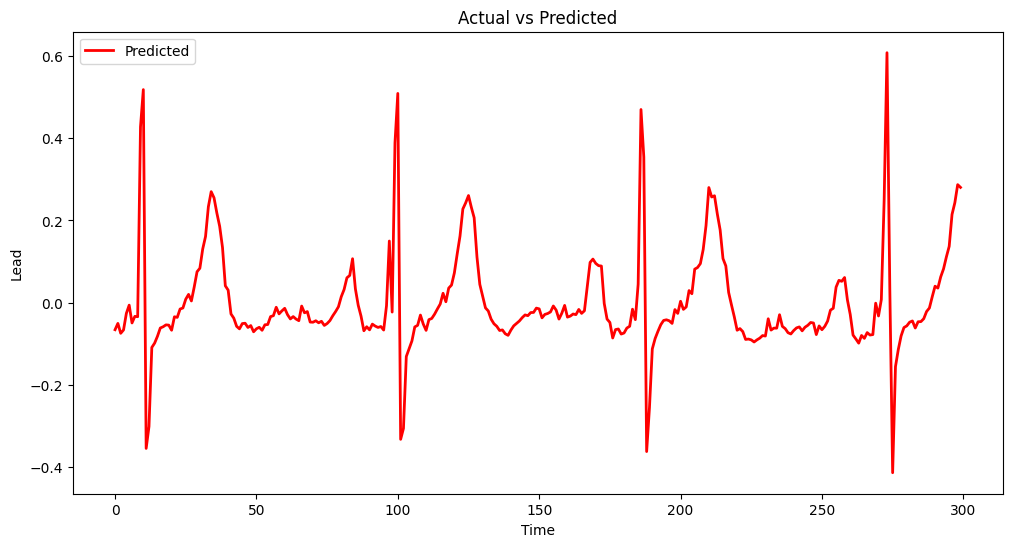

In [53]:
# Visualization
time_series = range(len(y_test))
df = pd.DataFrame({'Time': time_series, 'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Actual', data=df[:300], label='Actual', linewidth=2, color='blue')
#sns.lineplot(x='Time', y='Predicted', data=df[:5000], label='Predicted', linewidth=2, color='red')
plt.xlabel('Time')
plt.ylabel('Lead')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



plt.figure(figsize=(12, 6))
#sns.lineplot(x='Time', y='Actual', data=df[:5000], label='Actual', linewidth=2, color='blue')
sns.lineplot(x='Time', y='Predicted', data=df[:300], label='Predicted', linewidth=2, color='red')
plt.xlabel('Time')
plt.ylabel('Lead')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

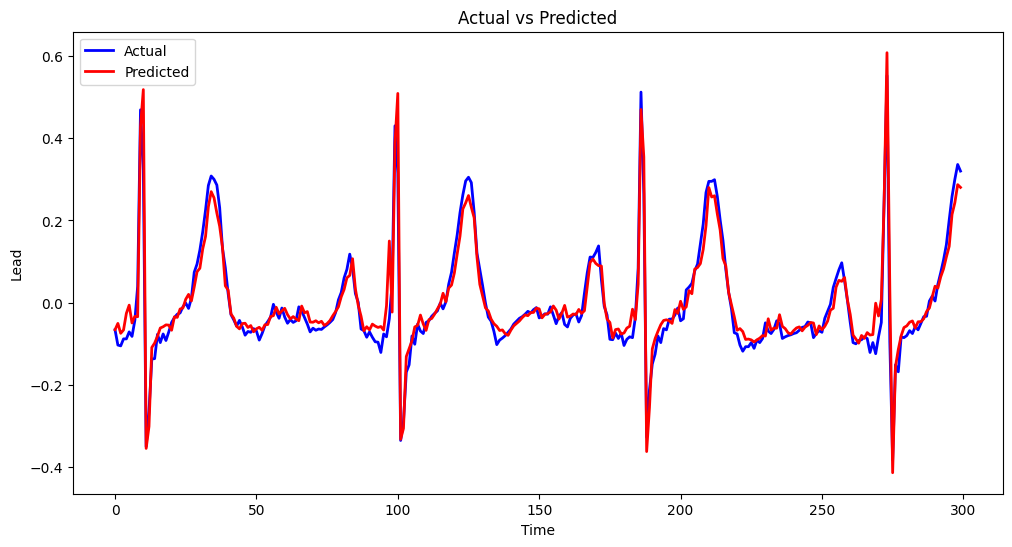

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Actual', data=df[:300], label='Actual', linewidth=2, color='blue')
sns.lineplot(x='Time', y='Predicted', data=df[:300], label='Predicted', linewidth=2, color='red')
plt.xlabel('Time')
plt.ylabel('Lead')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [55]:
# Save the model
model.save('lead_V6_2000.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
